<a href="https://colab.research.google.com/github/CarlosBrys/ProduccionYerbaMate/blob/main/EvolucionProduccionYerbaMate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# Esto tiene formato de código
```

# **Evolucion de la Producciñón de Yerba Mate en Misiones**

Este proyecto utiliza algoritmos de aprendizaje de máquina para hallar correlaciones que permitan hacer predicciones producción de Yerba Mate, basados en el registro histórico de la producción.

**Total**: 180 registros

**Conjunto de datos**:
Datos estadísticos publicados por el INYM


**Modelo**: 
Regresión lineal polinómica. Se entra el modelo con grados 3 al 10


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy
from sklearn.metrics import r2_score
%matplotlib inline


In [3]:
DatosEntrenamiento = pd.read_csv('https://raw.githubusercontent.com/CarlosBrys/ProduccionYerba/main/YerbaMate.csv')
print(DatosEntrenamiento.head(10))


HTTPError: ignored

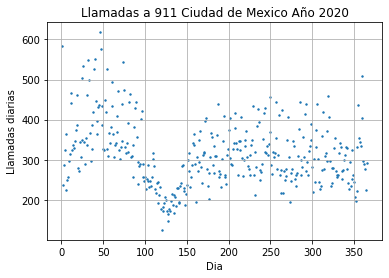

In [ ]:
# Separar entre las variables de entrada (x) y salida (y) para el entrenamiento
X = DatosEntrenamiento.iloc[:, 1:-1].values
y = DatosEntrenamiento.iloc[:, -1].values

# Visualizar el conjunto de datos de entrenamiento
plt.title("Llamadas a 911 Ciudad de Mexico Año 2020")
plt.ylabel('Llamadas diarias')
plt.xlabel('Dia')
plt.grid()
plt.scatter(X, y, s=2) # Datos observados
plt.show()

Grado= 3 : R^2= 0.13631588039196374


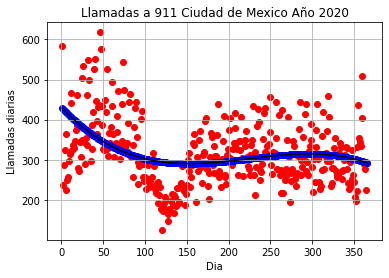

Grado= 4 : R^2= 0.16347982893030444


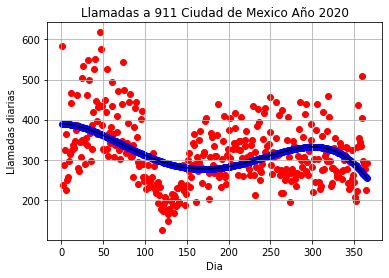

Grado= 5 : R^2= 0.30907737329622165


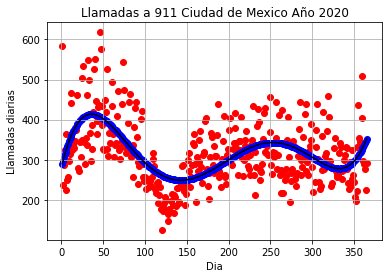

Grado= 6 : R^2= 0.32764879317743834


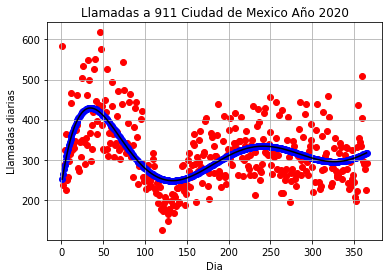

Grado= 7 : R^2= 0.3313128586237021


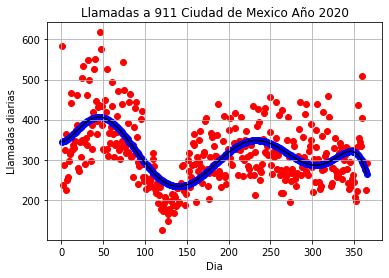

Grado= 8 : R^2= 0.2706487131672465


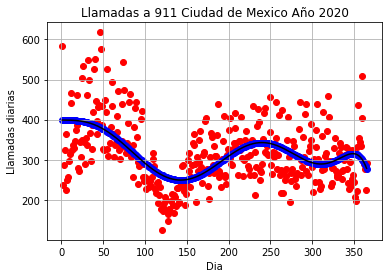

Grado= 9 : R^2= 0.1991933581750157


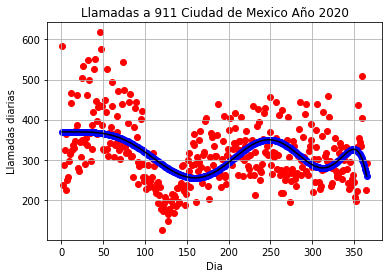

Grado= 10 : R^2= 0.11429999992424533


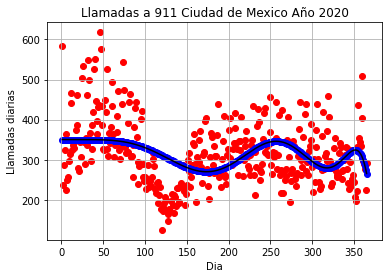

array([[ 3.        ,  0.13631588],
       [ 4.        ,  0.16347983],
       [ 5.        ,  0.30907737],
       [ 6.        ,  0.32764879],
       [ 7.        ,  0.33131286],
       [ 8.        ,  0.27064871],
       [ 9.        ,  0.19919336],
       [10.        ,  0.1143    ]])

In [ ]:
# Se prueban polinomios de grado 3 al 10

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
soluciones = np.zeros(16)
soluciones.shape = (8,2)

for i in range(3, 11):
  poly_reg = PolynomialFeatures(degree = i)
  X_poly = poly_reg.fit_transform(X)
  lin_reg = LinearRegression()
  lin_reg.fit(X_poly, y)
  y_pred = lin_reg.predict(X_poly)
  ValorR2E = r2_score(y,y_pred)
  soluciones[i-3,0] = i
  soluciones[i-3,1] = ValorR2E
  print("Grado=", i, ": R^2=", ValorR2E)
  X_grid = np.arange(min(X), max(X), 0.1)
  X_grid = X_grid.reshape((len(X_grid), 1))
  plt.scatter(X, y, color = 'red')
  plt.scatter(X, y_pred, color = 'blue')
  plt.plot(X_grid, lin_reg.predict(poly_reg.fit_transform(X_grid)), color = 'black')
  plt.title("Llamadas a 911 Ciudad de Mexico Año 2020")
  plt.ylabel('Llamadas diarias')
  plt.xlabel('Dia')
  plt.grid()
  plt.show()

soluciones